In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
import os

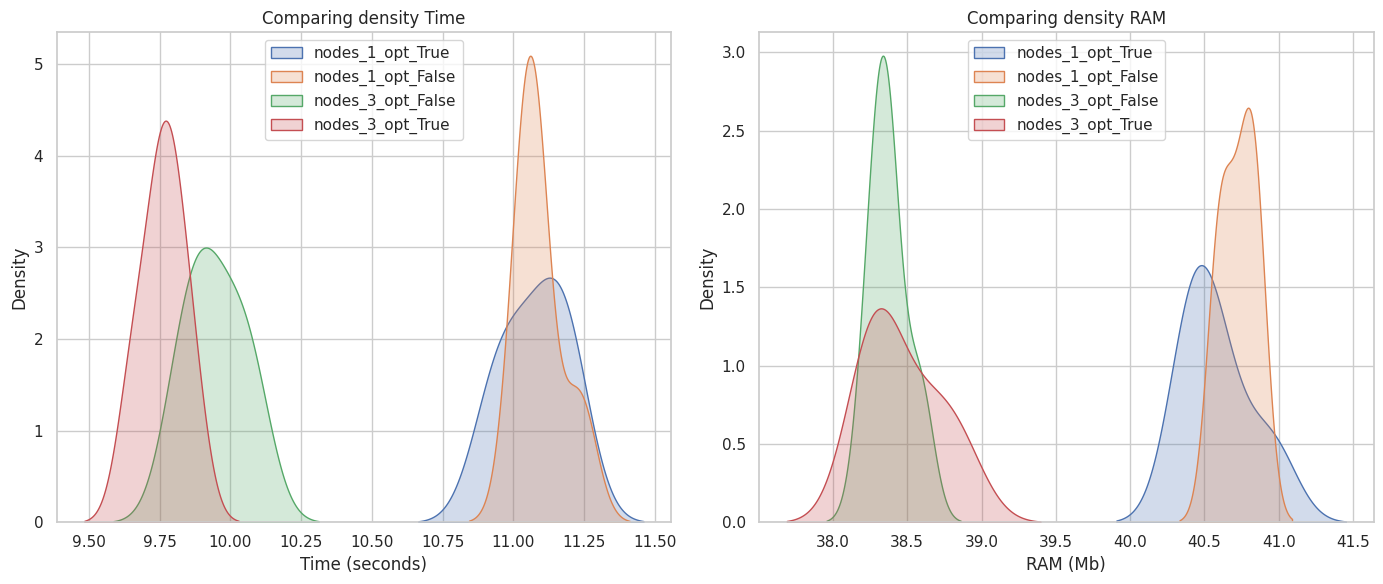

: 

In [ ]:
def parse_file(filename):
    times = []
    rams = []

    with open(filename, 'r') as f:
        for line in f:
            time_match = re.search(r'Time: (\d+\.\d+)', line)
            ram_match = re.search(r'RAM: (\d+\.\d+)', line)

            if time_match and ram_match:
                times.append(float(time_match.group(1)))
                rams.append(float(ram_match.group(1)))

    return pd.DataFrame({'Time': times, 'RAM': rams})

log_dir = 'logs'
file_names = [os.path.join(log_dir, f) for f in os.listdir(log_dir)
             if os.path.isfile(os.path.join(log_dir, f)) and f.endswith('.txt')]  # замените на ваши имена файлов
data_frames = {fname: parse_file(fname) for fname in file_names}

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for fname, df in data_frames.items():
    sns.kdeplot(df['Time'], fill=True, label=fname[5:-4])
plt.title('Comparing density Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Density')
plt.legend()

# RAM
plt.subplot(1, 2, 2)
for fname, df in data_frames.items():
    sns.kdeplot(df['RAM'], fill=True, label=fname[5:-4])
plt.title('Comparing density RAM')
plt.xlabel('RAM (Mb)')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()